\newpage

## Question 1


(1) Citation for the database: \
Parmar, R. (2018, July 9). Wine quality. Kaggle. https://www.kaggle.com/datasets/rajyellow46/wine-quality 

(2) Load the dataset into a pandas DataFrame for analysis

In [26]:
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


wine = pd.read_csv('/Users/echo/Desktop/Stats 3DA3 desktop/stats_3da_ass3/winequalityN.csv')
wine.head(6)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


(3) Perform an initial exploration of the dataset to understand its structure (the number of features, observations, and variable types). Write about at least two findings.

In [7]:
print(wine.dtypes)
print(wine.shape)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
(6497, 13)


According to the datatypes and the shape function shown, we can know that there are 6497 kinds of wine. \
Also, there are 13 different features of each wine recorded inside this csv table.
Except for `type` and `quality`, the rest of variable are float64. `type` is an object variable, `quality` is an int64 variable.

(4) Generate summary statistics for the dataset. Comment on the results (at least two statements). 

In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


According to our observation of summary statistics, we will find that not every feature's count is 6497, indicating that there will be some missing values in this database. (Ex:`fixed acidity`, `volative acidity`) \
For the feature `total sulfur dioxide`, it has the highest mean and max value. \
By comparing `residual sugar` and `alcohol`, since `alocohol` has the higher value of mean, `residual sugar` shows the larger max value than `alcohol`.

(5) Visualize the distribution of wine quality ratings. Comment on the plot (at least one statement).

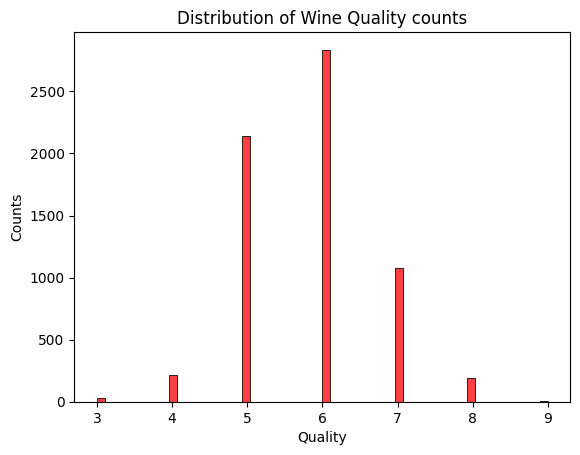

In [13]:
sns.histplot(wine, x='quality', color='red')
plt.title("Distribution of Wine Quality counts")
plt.ylabel("Counts")
plt.xlabel("Quality")
plt.show()

This graph is more like a normal distribution, which has a range from 3 to 9.\
Most of the wine counts are concentrated in the middle qualities 5, 6, and 7. While for the remaining 3, 4, 8, and 9, the counts of wine contained in these four qualities is less than 500.

(6) Drop the observations with quality scores less than or equal to four and greater than or equal to eight. Use this subset of the dataset for the following analysis.

In [14]:
wine2= wine[(wine['quality']>4)& (wine['quality']<8)]

(7) How many observations and unique quality scores are in the filtered data?

In [18]:
print(wine2.shape)
print(wine2['quality'].nunique())

(6053, 13)
3


There are 6053 observations in the filtered data. (only include the quality 5,6,7)\
The unique quality scores is 3.

(8) Create a correlation heatmap. Describe any correlations between features using a correlation matrix (at least two statements).

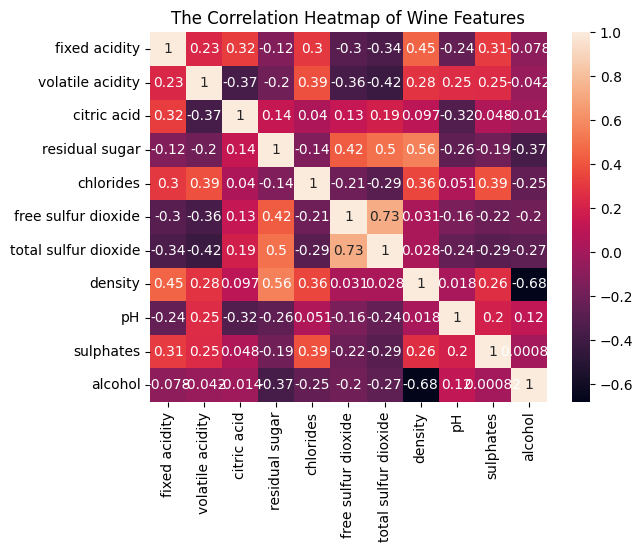

In [19]:
wine2_no=wine2.drop(['type', 'quality'], axis=1)
sns.heatmap(wine2_no.corr(), annot=True)
plt.title("The Correlation Heatmap of Wine Features")
plt.show()

Based on this heatmap matrix, we can see that the diagonal values of this plot are all 1, which means that the correlation between each feature themselves is 1. For `density` and `alcohol`, we can observe a strong negative correlation of -0.68. For `total sulfure dioxide` and `free sulfur dioxide`, they have a strong positive correlation with a value of 0.73.

(9) Are there any missing values? If you identify any, drop those observations with the missing values.

In [22]:
print(wine2.isnull().sum())
#the missing valus are shown in following chart

type                    0
fixed acidity           9
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               3
alcohol                 0
quality                 0
dtype: int64


In [23]:
wine2.dropna(inplace=True)

/var/folders/yl/f8b40vt51f9bv87q8m3_dhch0000gn/T/ipykernel_24174/3313303522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine2.dropna(inplace=True)


(10) In this assignment, skip the outlier analysis. Standardize the predictor variables (don't use the `type` variable) to ensure they are on the same scale. Why is standardizing predictor variables crucial when using the K-Nearest Neighbors (KNN) classifier?

In [27]:
x=wine2.drop(['type','quality'], axis=1)
y=wine2.quality
x_scaled=scale(x, axis=0)

(11) Split the dataset into a training set(75\%) and a testing set (25\%).


In [28]:
x_train, x_test, y_train, y_test=train_test_split(
    x_scaled,
    y,
    test_size=0.25,
    random_state=0,
    stratify=y

)

(12)  Implement the KNN classifier using `scikit-learn`. Start with k=5.

In [29]:
knn5=neighbors.KNeighborsClassifier(
    n_neighbors=5,
    algorithm='brute'

)

knn5.fit(x_train, y_train) #train the model

KNeighborsClassifier(algorithm='brute')

(13) Train the model on the training set and make predictions on the test set.

In [30]:
pred5=knn5.predict(x_test)
pred5

array([6, 6, 5, ..., 6, 6, 6])

(14) Calculate the accuracy of the model. Discuss the model's performance (compare the model's performance to flipping a coin)

In [31]:
metrics.accuracy_score(y_test, pred5)


0.5982735723771581

`y_test` is actual quality of testing set \
`pred5`: use knn5 to predict the quality by x_test

(15) Generate a confusion matrix. Describe the confusion matrix (what are rows and columns?)

In [32]:
from sklearn.metrics import confusion_matrix
con_martix= confusion_matrix(y_test, pred5)
con_martix

array([[342, 180,  10],
       [186, 444,  75],
       [ 35, 119, 115]])

The first row of this matrix belongs to quality 5, the second row belongs to quality 6, and the third row belongs to quality 7. And all three rows belong to the real value y_test. And for each column, the first column is the value we predicted for quality 5, the second column is the value we predicted forquality 6, the third column is the value we predicted for quality 7.

(16) Discuss any potential improvements based on the accuracy and confusion matrix.\
We can try the different k values to find the optimal number of neighbors, also we can try the different technique.

(17)Experiment with different values of $K$ to find the optimal number of neighbors for the KNN classifier.

In [35]:
k_range= range(1,20)  #set the k range
list=[]  #set the empty matrix first, and fill it by using the for loop
for k in k_range:
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred= knn.predict(x_test)
    list.append(metrics.accuracy_score(y_test, y_pred)) #compare the true and predicted y values

list



[0.6553784860557769,
 0.6162018592297477,
 0.6049136786188579,
 0.6248339973439575,
 0.5982735723771581,
 0.6095617529880478,
 0.6075697211155379,
 0.6108897742363878,
 0.601593625498008,
 0.5982735723771581,
 0.5916334661354582,
 0.602921646746348,
 0.6075697211155379,
 0.6115537848605578,
 0.6082337317397079,
 0.6108897742363878,
 0.6049136786188579,
 0.6062416998671979,
 0.5962815405046481]

(18) Plot the relationship between $K$ and model accuracy.

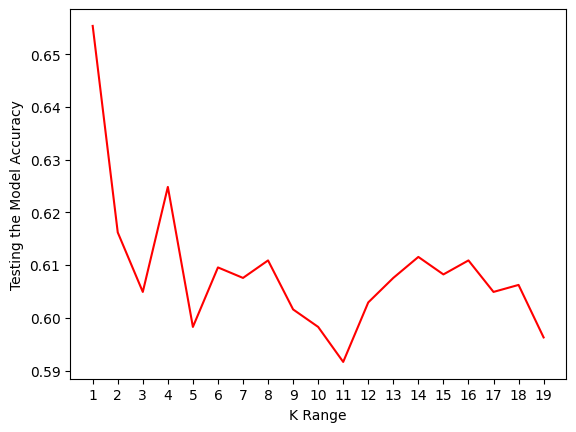

In [38]:
plt.plot(k_range, list, color='red')
plt.ylabel('Testing the Model Accuracy')
plt.xlabel('K Range')
plt.xticks(k_range)
plt.show()

(19) Select the best $K$ value and explain why it is optimal.

The best value of k should be 4, because at k=4, it is not as sensitive as at k=1 or k=2 which has more dependency. Also, when k=4, it has a higher accuracy than the rest of k values. Also, by looking at the plot, k=4 is a local maximum around that range.

(20) Reflect on the performance of the KNN algorithm for this particular dataset.

For this dataset, when our k value is increasing, our accuracy is not consistently increasing all the time. It does not demonstrate an upward trend as we expected. Instead, it shows a slight downward trend for k within 5 and 11.

(21) Propose at least two ways the model performance could be further improved.

1. variable selection: Only select the variables that are related to the `quality` variable, lowering the dimension
2. dimension reduction: This method can also avoid the curse of dimension which makes a better model performance

\newpage

## 2. Helper's name.

Jiaying Xie（400307943）